In [1]:
# Reduce loading of auto fill for jupyter lab
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Matplotlib settings

# Make matplotlib images appear inline in code
%matplotlib inline

d ={
    'axes.titlesize': 22,
    'axes.titleweight': 550,
    'axes.titlepad': 20,
    'axes.labelsize': 16,
    'axes.labelweight': 550,
    'axes.labelpad': 20,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
}

plt.rcParams.update(d)

In [4]:
def figure_elements(size_x, size_y,
                    title=None, x_label=None, y_label=None):
    
    fig, ax = plt.subplots()
    
    # Set figure size
    fig.set_size_inches(size_x, size_y)
    
    # set a title and labels
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    return(fig, ax)

In [5]:
covid_data = pd.read_csv('data/covid_data.csv', index_col=0)

In [6]:
chess_games = pd.read_csv('data/games.csv', index_col=0)

In [7]:
covid_curr = covid_data[(covid_data['date'] == '2020-05-19') &
                        (~covid_data['continent'].isna()) &
                        (covid_data['new_deaths_per_million'] > 0)]

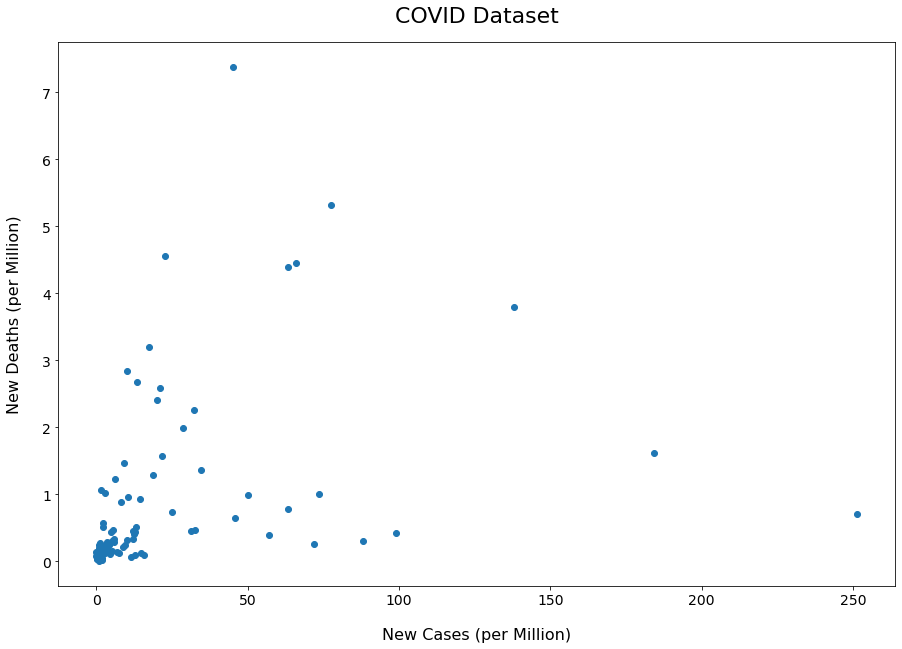

In [8]:
fig, ax = figure_elements(15, 10, 'COVID Dataset', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)')

ax.scatter(covid_curr['new_cases_per_million'], covid_curr['new_deaths_per_million'])

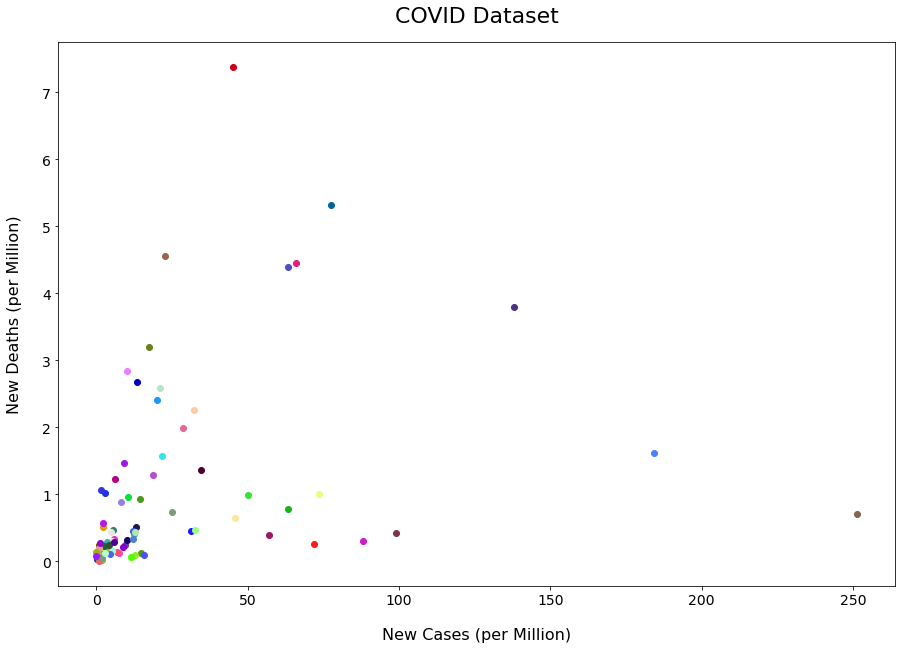

In [9]:
fig, ax = figure_elements(15, 10, 'COVID Dataset', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)')

# plot each data-point
# with a randomly generated RGB colour
for i in range(len(covid_curr['location'])):
    ax.scatter(covid_curr['new_cases_per_million'][i],
               covid_curr['new_deaths_per_million'][i],
               color=np.random.rand(3,).round(1))

In [10]:
covid_to_date = covid_data[(covid_data['location'] == 'United Kingdom') &
                           (~covid_data['continent'].isna()) &
                           (covid_data['new_deaths_per_million'] > 0)]

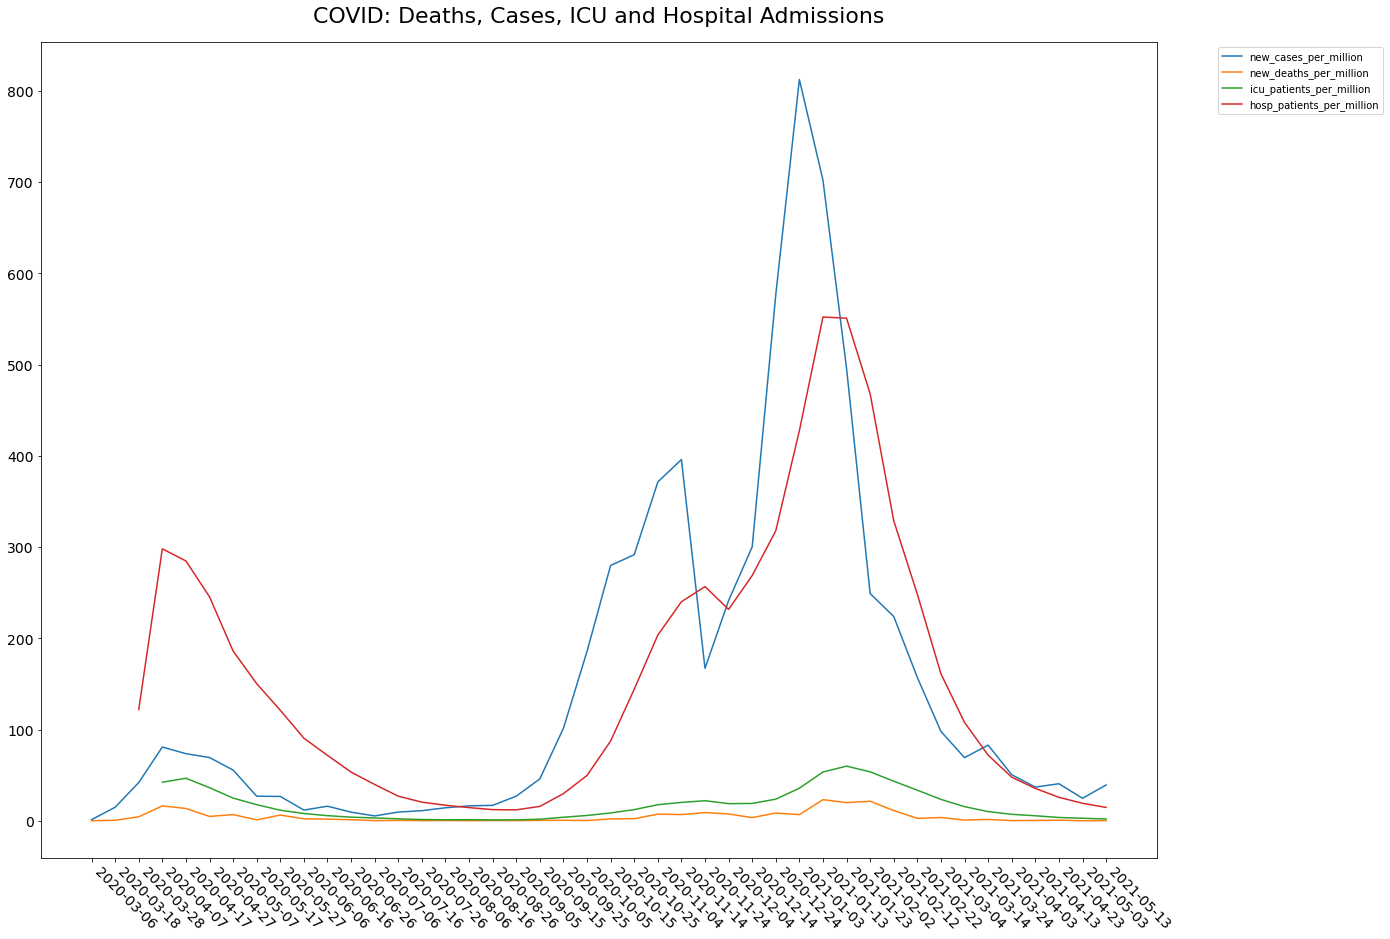

In [11]:
# get columns to plot
columns = ['new_cases_per_million',
           'new_deaths_per_million',
           'icu_patients_per_million',
           'hosp_patients_per_million']

# create x data
x_data = covid_to_date['date'].values[0::10]

fig, ax = figure_elements(20, 15, 'COVID: Deaths, Cases, ICU and Hospital Admissions')

# plot each column
for column in columns:
    ax.plot(x_data, covid_to_date[column][0::10], label=column)
    
# set title and legend
plt.xticks(rotation=-45, ha='left')
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')

In [12]:
high_rated = chess_games[(chess_games['rated'] == True) &
                         (chess_games['black_rating'] > 2000) &
                         (chess_games['white_rating'] > 2000)]

(array([ 94., 336., 203.,  87.,  28.,   7.,   2.,   0.,   0.,   2.]),
 array([  2. ,  36.7,  71.4, 106.1, 140.8, 175.5, 210.2, 244.9, 279.6,
        314.3, 349. ]),
 <BarContainer object of 10 artists>)

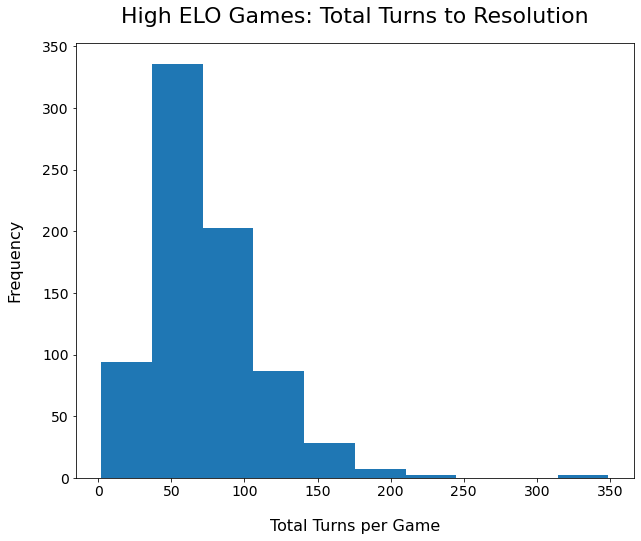

In [13]:
fig, ax = figure_elements(10, 8,
                         'High ELO Games: Total Turns to Resolution',
                         'Total Turns per Game',
                         'Frequency')

# plot histogram
ax.hist(high_rated['turns'])

In [14]:
high_rated.columns

Index(['rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [15]:
openings = high_rated['opening_name'].value_counts()
top_openings = openings[openings > 4].sort_index()

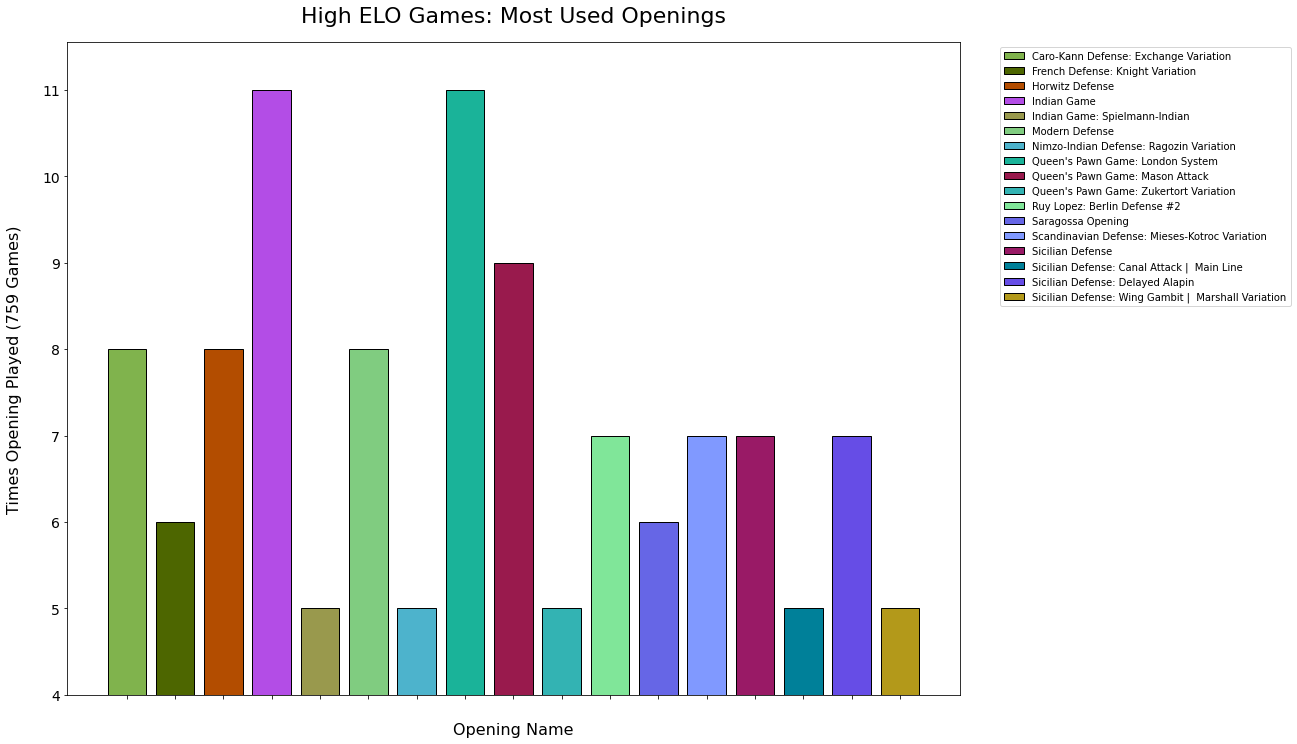

In [16]:
fig, ax = figure_elements(16, 12, 'High ELO Games: Most Used Openings',
                          'Opening Name',
                          f'Times Opening Played ({len(high_rated)} Games)')

# get x and y data
points = top_openings.index
frequency = top_openings.values

for i in range(len(points)):
    ax.bar(points[i],
           frequency[i],
           color=np.random.rand(3,).round(1),
           edgecolor='black'
          )
    
ax.set_xticklabels([])
ax.set_ylim(bottom=4)
plt.legend(points, bbox_to_anchor=(1.04, 1), loc='upper left')
    
plt.show()

In [17]:
covid_to_date.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
     

<AxesSubplot:title={'center':'High ELO: Rating Disparity'}, xlabel='black_rating', ylabel='white_rating'>

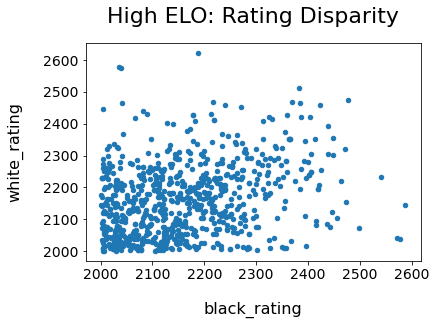

In [18]:
high_rated.plot.scatter(x='black_rating', y='white_rating', title='High ELO: Rating Disparity')

In [50]:
cov_columns = covid_to_date.columns
cov_columns = [x for x in columns if x not in ['total_deaths_per_million', 'total_cases_per_million', 'date']]

<AxesSubplot:title={'center':'COVID-19: UK Deaths and Cases'}, xlabel='date'>

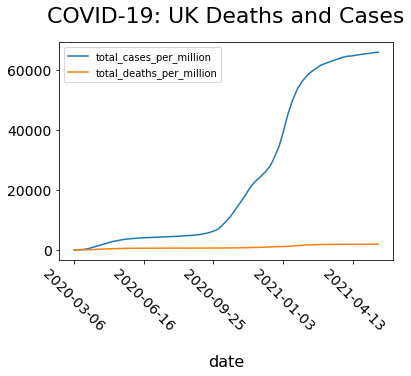

In [51]:
covid_to_date.drop(cov_columns, axis=1).plot.line(x='date', title='COVID-19: UK Deaths and Cases', rot=-45)

<AxesSubplot:title={'center':'High ELO Games: Turns Per Game'}, ylabel='Frequency'>

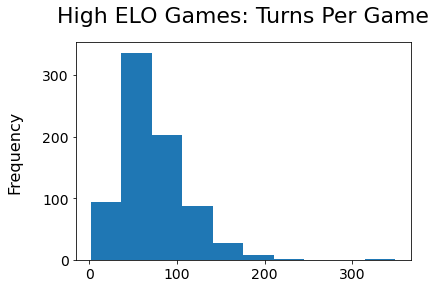

In [49]:
high_rated['turns'].plot.hist(title='High ELO Games: Turns Per Game')

In [52]:
chess_columns = high_rated.columns
chess_columns = [x for x in chess_columns if x not in ['turns', 'black_rating', 'white_rating']]

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>]], dtype=object)

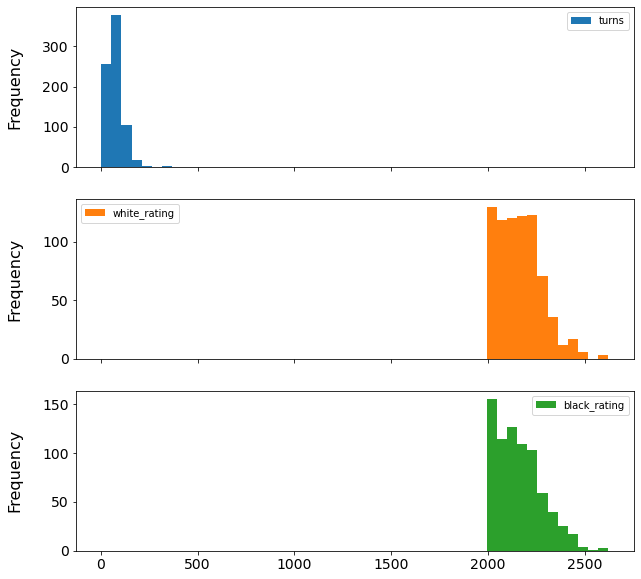

In [61]:
# How to not share x-axis?
high_rated.drop(chess_columns, axis=1).plot.hist(subplots=True, layout=(3,1), figsize=(10,10), bins=50)

In [70]:
not_top_openings = [x for x in high_rated['opening_name'].values if x not in top_openings]

In [69]:
high_rated['opening_name']

array(['Four Knights Game: Halloween Gambit',
       'Sicilian Defense: Alapin Variation |  Smith-Morra Declined',
       'Sicilian Defense: Lasker-Pelikan Variation |  Sveshnikov Variation |  Chelyabinsk Variation',
       "Queen's Pawn Game: Symmetrical Variation |  Pseudo-Catalan",
       'Benoni Defense: Taimanov Variation',
       'Nimzo-Indian Defense: Ragozin Variation', "Petrov's Defense",
       'Caro-Kann Defense: Karpov Variation |  Tiviakov-Fischer Attack',
       'Nimzo-Indian Defense: Three Knights Variation',
       'Sicilian Defense: Kan Variation |  Wing Attack',
       'Dutch Defense: Classical Variation |  Ilyin-Zhenevsky Variation |  Modern Main Line',
       'Sicilian Defense: Kan Variation |  Wing Attack',
       "English Opening: King's English Variation |  Two Knights Variation |  Reversed Dragon",
       "Queen's Pawn Game: Symmetrical Variation |  Pseudo-Catalan",
       'Nimzo-Indian Defense: Leningrad Variation',
       'Sicilian Defense: Lasker-Pelikan Vari

In [72]:
high_rated['opening_name'].drop(not_top_openings).value_counts().sort_index().plot.bar()

KeyError: '[\'Four Knights Game: Halloween Gambit\'\n \'Sicilian Defense: Alapin Variation |  Smith-Morra Declined\'\n \'Sicilian Defense: Lasker-Pelikan Variation |  Sveshnikov Variation |  Chelyabinsk Variation\'\n "Queen\'s Pawn Game: Symmetrical Variation |  Pseudo-Catalan"\n \'Benoni Defense: Taimanov Variation\' "Petrov\'s Defense"\n \'Caro-Kann Defense: Karpov Variation |  Tiviakov-Fischer Attack\'\n \'Nimzo-Indian Defense: Three Knights Variation\'\n \'Sicilian Defense: Kan Variation |  Wing Attack\'\n \'Dutch Defense: Classical Variation |  Ilyin-Zhenevsky Variation |  Modern Main Line\'\n \'Sicilian Defense: Kan Variation |  Wing Attack\'\n "English Opening: King\'s English Variation |  Two Knights Variation |  Reversed Dragon"\n "Queen\'s Pawn Game: Symmetrical Variation |  Pseudo-Catalan"\n \'Nimzo-Indian Defense: Leningrad Variation\'\n \'Sicilian Defense: Lasker-Pelikan Variation |  Schlechter Variation\'\n \'Four Knights Game: Scotch Variation Accepted\' \'Trompowsky Attack\'\n \'Vienna Game #2\' \'Vienna Game: Vienna Gambit |  Main Line\'\n \'Pirc Defense #2\'\n \'Four Knights Game: Spanish Variation |  Rubinstein Variation\'\n \'Modern Defense: Averbakh System |  Kotov Variation\'\n \'Benoni Defense: Classical Variation |  Averbakh-Grivas Attack\'\n \'System: Double Duck Formation\'\n "Queen\'s Gambit Declined: Traditional Variation" "Queen\'s Pawn Game"\n "King\'s Indian Defense" \'Ruy Lopez: Morphy Defense |  Tarrasch Variation\'\n \'Slav Defense: Quiet Variation |  Pin Defense\'\n \'Sicilian Defense: Old Sicilian\' \'Nimzo-Indian Defense\'\n \'Russian Game: Nimzowitsch Attack\'\n \'Russian Game: Karklins-Martinovsky Variation\'\n \'Italian Game: Giuoco Pianissimo |  Normal\'\n \'French Defense: Advance Variation |  Euwe Variation\'\n "English Opening: Anglo-Indian Defense |  Queen\'s Knight Variation"\n \'Sicilian Defense: Four Knights Variation\'\n \'Nimzo-Indian Defense: Classical Variation |  Noa Variation\'\n \'Owen Defense\' "Dutch Defense: Queen\'s Knight Variation"\n \'Ruy Lopez: Berlin Defense |  Rio de Janeiro Variation\'\n \'French Defense: Advance Variation |  Paulsen Attack\' \'Giuoco Piano\'\n \'Latvian Gambit Accepted |  Main Line\' \'Hungarian Opening\'\n \'French Defense: Advance Variation |  Paulsen Attack\'\n "Sicilian Defense: O\'Kelly Variation |  Yerevan System"\n \'Sicilian Defense: Staunton-Cochrane Variation\'\n \'Scandinavian Defense: Modern Variation #2\'\n \'Scandinavian Defense: Panov Transfer\'\n \'French Defense: Winawer Variation |  Poisoned Pawn Variation\'\n \'French Defense: Steinitz Variation |  Boleslavsky Variation\'\n \'Russian Game: Classical Attack |  Chigorin Variation\'\n \'Hungarian Opening: Symmetrical Variation\' "King\'s Indian Attack"\n \'Trompowsky Attack\' \'Ruy Lopez: Closed\' \'Sicilian Defense: Open\'\n \'Ruy Lopez: Morphy Defense |  Anderssen Variation\'\n \'Italian Game: Giuoco Pianissimo |  Italian Four Knights Variation\'\n "Queen\'s Gambit Refused: Marshall Defense"\n \'Sicilian Defense: Najdorf Variation |  English Attack\'\n \'Nimzo-Larsen Attack: Symmetrical Variation\'\n "Queen\'s Gambit Declined: Normal Defense" "Queen\'s Gambit Declined"\n \'French Defense: Chigorin Variation\'\n \'Nimzo-Larsen Attack: Modern Variation #4\'\n "Italian Game: Two Knights Defense |  Modern Bishop\'s Opening"\n "Queen\'s Gambit Refused: Baltic Defense |  Pseudo-Chigorin"\n \'Gruenfeld Defense: Stockholm Variation\'\n \'Ruy Lopez: Morphy Defense |  Anderssen Variation\'\n \'Scandinavian Defense: Gubinsky-Melts Defense\'\n \'Scotch Game: Classical Variation |  Intermezzo Variation\'\n \'Tarrasch Defense: Symmetrical Variation\'\n \'Sicilian Defense: Closed Variation |  Traditional\'\n "English Opening: King\'s English Variation" \'Reti Opening\'\n \'Grob Opening: Grob Gambit |  Fritz Gambit\' \'Doery Defense\'\n \'Benko Gambit Accepted |  Fianchetto Variation\'\n "Queen\'s Pawn Game: Torre Attack |  Gruenfeld Variation |  Main Line"\n \'Sicilian Defense: Dragon Variation |  Classical Variation |  Normal Line\'\n \'Sicilian Defense: Dragon Variation |  Classical Variation #2\'\n \'Benoni Defense\'\n \'Sicilian Defense: Nyezhmetdinov-Rossolimo Attack |  Fianchetto Variation\'\n \'Ruy Lopez: Classical Variation |  Zukertort Gambit\'\n \'Sicilian Defense: Nyezhmetdinov-Rossolimo Attack\'\n \'Tarrasch Defense: Two Knights Variation\'\n \'French Defense: Exchange Variation\' \'Reti Opening #2\'\n \'Semi-Slav Defense: Chigorin Defense\'\n \'Four Knights Game: Scotch Variation Accepted\'\n \'Sicilian Defense: Paulsen Variation |  Normal Variation\'\n "English Opening: King\'s English Variation"\n "Queen\'s Indian Defense: Capablanca Variation"\n \'French Defense: Tarrasch Variation |  Closed Variation\'\n "Queen\'s Gambit Declined: 4.Bg5 Be7 |  5.e3 O-O"\n \'Scandinavian Defense: Main Line |  Mieses Variation\'\n \'Scotch Game: Mieses Variation\'\n \'Ruy Lopez: Open Variations |  Howell Attack #2\'\n \'Ruy Lopez: Open Variations |  Riga Variation\'\n \'Benko Gambit Accepted |  Fully Accepted Variation\' \'Pirc Defense #4\'\n \'Modern Defense: Two Knights Variation |  Suttles Variation\'\n \'Sicilian Defense: Accelerated Dragon |  Modern Bc4 Variation\'\n \'Nimzo-Indian Defense: Panov Attack |  Main Line\'\n \'Nimzo-Indian Defense: Normal Variation |  Gligoric System\'\n \'Sicilian Defense: Closed Variation |  Traditional\'\n \'French Defense: Winawer Variation |  Advance Variation\'\n \'Benko Gambit Declined |  Quiet Line\'\n "Ruy Lopez: Berlin Defense |  l\'Hermet Variation"\n "King\'s Indian Defense: Averbakh Variation |  Flexible Defense"\n \'Englund Gambit\'\n \'English Opening: Anglo-Indian Defense |  Anglo-Gruenfeld Variation #3\'\n \'Sicilian Defense: Kalashnikov Variation\'\n \'Sicilian Defense: Wing Gambit |  Carlsbad Variation\' \'Owen Defense\'\n \'French Defense: Advance Variation |  Euwe Variation\'\n \'French Defense: Two Knights Variation\'\n \'French Defense: La Bourdonnais Variation\' \'Pirc Defense #4\'\n \'French Defense: Winawer Variation |  Advance Variation\'\n \'Sicilian Defense: Wing Gambit Deferred\'\n \'Dutch Defense: Ilyin-Zhenevsky |  Winter Variation\'\n \'English Opening: Agincourt Defense #3\'\n "Zukertort Opening: Queen\'s Gambit Invitation" \'Pirc Defense\'\n \'Scandinavian Defense: Main Line |  Leonhardt Gambit\'\n \'Scandinavian Defense: Main Line |  Leonhardt Gambit\'\n \'Ruy Lopez: Morphy Defense\' \'Dutch Defense: Rubinstein Variation\'\n \'Sicilian Defense: Wing Gambit |  Carlsbad Variation\'\n \'Modern Defense: Norwegian Defense\'\n \'French Defense: Reti-Spielmann Attack\'\n \'Sicilian Defense: Wing Gambit |  Carlsbad Variation\'\n \'French Defense: Winawer Variation |  Maroczy-Wallis Variation\'\n "Queen\'s Pawn Game: Chigorin Variation"\n \'English Opening: Agincourt Defense #2\' \'Ruy Lopez: Schliemann Defense\'\n \'Torre Attack\' \'Caro-Kann Defense: Advance Variation\' \'Torre Attack\'\n \'Caro-Kann Defense: Classical |  Spassky Variation\'\n "King\'s Indian Defense: Accelerated Averbakh Variation"\n "Queen\'s Gambit Accepted: Rosenthal Variation"\n "Queen\'s Pawn Game: Symmetrical Variation" \'Semi-Slav Defense: Main Line\'\n \'Scandinavian Defense: Modern Variation |  Gipslis Variation\'\n \'Caro-Kann Defense: Advance Variation |  Botvinnik-Carls Defense\'\n "Queen\'s Gambit Declined"\n \'Caro-Kann Defense: Panov Attack |  Gunderam Attack\' \'Torre Attack\'\n \'Dutch Defense\' "Dutch Defense: Queen\'s Knight Variation"\n \'Italian Game: Classical Variation |  Giuoco Pianissimo\'\n "King\'s Indian Defense"\n \'Tarrasch Defense: Classical Variation |  Advance Variation\'\n \'Ruy Lopez: Berlin Defense |  Rio Gambit Accepted\'\n \'French Defense: Steinitz Variation |  Boleslavsky Variation\'\n "Queen\'s Gambit Declined"\n "King\'s Indian Defense: Fianchetto Variation |  Yugoslav System |  without Nc3"\n \'Ruy Lopez: Morphy Defense |  Modern Steinitz Defense\'\n "King\'s Gambit |  Falkbeer Countergambit |  Nimzowitsch-Marshall Countergambit"\n \'French Defense: Exchange Variation\'\n \'Sicilian Defense: Smith-Morra Gambit Accepted |  Pin Defense\'\n \'Sicilian Defense: Dragon Variation |  Classical Variation #2\'\n \'Semi-Slav Defense: Accelerated Move Order\'\n "Queen\'s Gambit Declined: Modern Variation |  Normal Line"\n \'Sicilian Defense: Kan Variation |  Modern Variation\'\n \'Scotch Game: Scotch Gambit\' \'London System\' \'Richter-Veresov Attack #2\'\n "Queen\'s Pawn Game: Chigorin Variation" \'Ruy Lopez: Cozio Defense\'\n \'Old Benoni Defense\' \'Giuoco Piano\' \'Ruy Lopez: Cozio Defense\'\n \'London System\' \'Giuoco Piano\' \'London System\' \'Scotch Game\'\n \'Italian Game: Classical Variation #2\'\n "Queen\'s Gambit Accepted: Old Variation" "Queen\'s Pawn"\n \'French Defense: Rubinstein Variation\'\n \'Van Geet Opening: Dunst-Perrenet Gambit\' "Queen\'s Gambit Declined"\n \'Ruy Lopez: Berlin Defense |  Beverwijk Variation\'\n \'Four Knights Game: Spanish Variation |  Classical Variation\'\n "Queen\'s Pawn Game: Symmetrical Variation" \'Ruy Lopez: Steinitz Defense\'\n \'Anderssen Opening\' "Queen\'s Pawn Game: Torre Attack"\n \'Italian Game: Two Knights Defense |  Fried Liver Attack\'\n \'Anderssen Opening\' "King\'s Gambit Accepted |  Polerio Gambit"\n \'Englund Gambit Declined |  Reversed French\'\n \'Neo-Gruenfeld Defense: Delayed Exchange Variation\'\n \'Sicilian Defense: Old Sicilian\'\n \'Sicilian Defense: Kalashnikov Variation\'\n \'Sicilian Defense: Hyperaccelerated Fianchetto\'\n \'Ruy Lopez: Morphy Defense |  Anderssen Variation\'\n \'Semi-Slav Defense: Normal Variation\' \'Rat Defense: Small Center Defense\'\n \'Sicilian Defense: Dragon Variation |  Yugoslav Attack |  Panov Variation\'\n \'Sicilian Defense: Closed Variation\' \'Sicilian Defense: Closed Variation\'\n \'Sicilian Defense: Dragon Variation |  Yugoslav Attack |  Modern Line\'\n \'Sicilian Defense: Dragon |  6.Be3\'\n \'Alekhine Defense: Exchange Variation\'\n \'Sicilian Defense: Dragon Variation |  Classical Variation #2\'\n \'Sicilian Defense: Closed Variation |  Korchnoi Defense\'\n "Ruy Lopez: Berlin Defense |  l\'Hermet Variation"\n \'Sicilian Defense: Closed\'\n \'French Defense: Winawer Variation |  Poisoned Pawn Variation\'\n \'Franco-Benoni Defense\' \'Three Knights Opening\'\n \'French Defense: Exchange Variation |  Monte Carlo Variation\'\n \'Four Knights Game: Italian Variation\'\n \'Italian Game: Two Knights Defense |  Polerio Defense |  Bishop Check Line\'\n \'Trompowsky Attack\' \'English Opening: Mikenas-Carls Variation #2\'\n \'Scandinavian Defense\' \'Nimzo-Indian Defense: Classical Variation\'\n "English Opening: King\'s English Variation |  Four Knights Variation |  Quiet Line #3"\n "English Opening: King\'s English Variation |  Four Knights Variation |  Fianchetto Line"\n \'French Defense: Tarrasch Variation |  Closed Variation\'\n "English Opening: King\'s English Variation"\n \'Scandinavian Defense: Main Line\'\n \'Sicilian Defense: Nimzowitsch Variation |  Main Line\'\n \'Sicilian Defense: Accelerated Dragon |  Modern Bc4 Variation\'\n \'Sicilian Defense: Classical Variation\'\n \'Caro-Kann Defense: Classical Variation\'\n \'Benko Gambit Accepted |  Yugoslav |  without 7...Bxf1\'\n \'Semi-Slav Defense: Meran Variation |  Wade Variation\'\n \'Reti Opening: Reti Accepted\' \'Modern Defense: Beefeater Variation\'\n "Queen\'s Gambit Refused: Chigorin Defense |  Main Line"\n "King\'s Indian Attack" \'Old Indian Defense: Two Knights Variation\'\n "Polish Opening: Queen\'s Indian Variation"\n \'Nimzo-Indian Defense: Normal Line\'\n \'Sicilian Defense: Najdorf |  Lipnitsky Attack\'\n \'Vienna Game: Anderssen Defense\'\n "Queen\'s Gambit Accepted: Showalter Variation"\n \'Trompowsky Attack: Classical Defense |  Big Center Variation\'\n \'Scandinavian Defense: Portuguese Variation\'\n \'Trompowsky Attack: Classical Defense |  Big Center Variation\'\n \'English Opening: Anglo-Indian Defense |  Scandinavian Defense |  Exchange Variation\'\n \'English Opening: Carls-Bremen System\'\n \'English Opening: Anglo-Indian Defense |  Scandinavian Defense |  Exchange Variation\'\n \'English Opening: Anglo-Scandinavian Defense\'\n \'Scandinavian Defense: Modern Variation #2\'\n "King\'s Indian Defense: Normal Variation |  Rare Defenses"\n \'Sicilian Defense: Staunton-Cochrane Variation\'\n \'Ruy Lopez: Steinitz Defense\'\n \'Sicilian Defense: Closed Variation |  Traditional\'\n \'Sicilian Defense: Alapin Variation\'\n \'Russian Game: Modern Attack |  Center Variation\' \'Scandinavian Defense\'\n \'Bird Opening: Williams Gambit\' \'Zukertort Opening: Tennison Gambit\'\n \'Three Knights Opening\'\n "Queen\'s Pawn Game: Torre Attack |  Gruenfeld Variation |  Main Line"\n \'Scotch Game: Classical Variation\'\n "Sicilian Defense: O\'Kelly Variation |  Yerevan System"\n \'Gruenfeld Defense: Three Knights Variation\'\n \'Sicilian Defense: Scheveningen Variation |  Modern Variation\'\n \'French Defense: Normal Variation\'\n \'Nimzowitsch Defense |  Declined Variation\' \'Nimzowitsch Defense\'\n \'French Defense: Normal Variation\'\n \'Sicilian Defense: Modern Variations |  Tartakower\'\n \'Nimzowitsch Defense: Kennedy Variation |  Linksspringer Variation\'\n \'Caro-Kann Defense: Classical |  7...Nd7\' \'Vienna Game #2\'\n \'Budapest Defense: Adler Variation\'\n \'Sicilian Defense: Wing Gambit |  Carlsbad Variation\'\n "Queen\'s Gambit Declined: Normal Defense"\n \'French Defense: Advance Variation\' \'French Defense: Chigorin Variation\'\n \'Danish Gambit Accepted |  Schlechter Defense\'\n \'French Defense: Chigorin Variation\'\n \'Four Knights Game: Scotch Variation Accepted\'\n \'Sicilian Defense: Dragon Variation\'\n "Queen\'s Pawn Game: Symmetrical Variation"\n \'Sicilian Defense: Old Sicilian\' \'Robatsch (Modern) Defense\' \'Ruy Lopez\'\n \'Ruy Lopez: Morphy Defense |  Classical Defense Deferred\'\n \'Ponziani Opening\' \'Four Knights Game: Scotch Variation Accepted\'\n \'Sicilian Defense: Dragon Variation\'\n "Queen\'s Pawn Game: Symmetrical Variation"\n \'Sicilian Defense: Old Sicilian\' \'Robatsch (Modern) Defense\' \'Ruy Lopez\'\n \'Ruy Lopez: Morphy Defense |  Classical Defense Deferred\'\n \'Ponziani Opening\'\n \'Nimzo-Indian Defense: Normal Variation |  Gligoric System |  Bernstein Defense\'\n \'Pirc Defense #3\'\n \'Caro-Kann Defense: Exchange Variation |  Rubinstein Variation\'\n \'Ruy Lopez: Closed |  8.c3\' \'Sicilian Defense: Keres Variation\'\n "Queen\'s Gambit Declined: Hastings Variation"\n \'Semi-Slav Defense: Marshall Gambit\'\n \'Italian Game: Giuoco Pianissimo |  Italian Four Knights Variation\'\n "Queen\'s Gambit Declined: Exchange Variation |  Positional Variation"\n \'Nimzo-Indian Defense: Normal Variation |  Ragozin Variation\'\n "Queen\'s Gambit Declined: Exchange Variation |  Positional Variation"\n "King\'s Indian Defense: Orthodox Variation |  Aronin-Taimanov Defense"\n \'French Defense: Marshall Variation\'\n "Queen\'s Gambit Declined: Lasker Defense" \'Sicilian Defense #2\'\n "Queen\'s Indian Defense: Fianchetto Traditional"\n \'Gruenfeld Defense: Exchange Variation |  Spassky Variation\'\n \'Caro-Kann Defense: Classical |  Spassky Variation\'\n \'Four Knights Game: Spanish Variation\' \'Semi-Slav Defense\'\n "King\'s Indian Defense: Orthodox Variation |  Classical System"\n "King\'s Indian Defense"\n \'Sicilian Defense: Najdorf Variation |  Opocensky Variation |  Modern Line\'\n \'Sicilian Defense: Smith-Morra Gambit\'\n \'Nimzowitsch Defense: Lean Variation |  Colorado Counter Accepted\'\n \'Sicilian Defense: Sozin Attack\'\n \'Sicilian Defense: Najdorf Variation |  Amsterdam Variation\'\n \'Modern Defense: Three Pawns Attack\'\n \'Sicilian Defense: Scheveningen Variation |  Classical Variation #2\'\n \'Italian Game: Classical Variation |  Giuoco Pianissimo\'\n \'Nimzo-Indian Defense: Saemisch Variation |  Accelerated\'\n \'Sicilian Defense: Najdorf Variation\'\n \'Zukertort Opening: Sicilian Invitation\'\n \'Nimzowitsch Defense: Mikenas Variation\'\n \'French Defense: Mediterranean Defense\' "Queen\'s Pawn Game #3"\n \'Modern Defense: Two Knights Variation\' "Queen\'s Pawn Game"\n \'Blumenfeld Countergambit Accepted\'\n "Queen\'s Indian Defense: Fianchetto Variation |  Saemisch Variation"\n "French Defense: King\'s Indian Attack"\n \'Nimzo-Indian Defense: Classical Variation\'\n \'French Defense: Tarrasch Variation |  Closed Variation #2\'\n "King\'s Indian Defense: Orthodox Variation |  Aronin-Taimanov Defense"\n \'Italian Game: Classical Variation |  Giuoco Pianissimo\'\n \'English Opening: Agincourt Defense\'\n \'English Opening: Carls-Bremen System\'\n \'Sicilian Defense: Lasker-Pelikan Variation\'\n \'Scandinavian Defense: Modern Variation #2\'\n \'Ruy Lopez: Morphy Defense |  Schliemann Defense Deferred\'\n \'Caro-Kann Defense: Advance Variation |  Tal Variation\'\n \'Sicilian Defense: Chekhover Variation\'\n \'Caro-Kann Defense: Advance Variation |  Tal Variation\'\n \'Sicilian Defense: Smith-Morra Gambit Accepted |  Pin Defense\'\n "English Opening: King\'s English Variation |  Two Knights Variation"\n \'English Opening: Mikenas-Carls Variation #2\'\n "English Opening: King\'s English Variation |  Four Knights Variation |  Korchnoi Line"\n \'Russian Game: Classical Attack\' \'Slav Indian\'\n \'Sicilian Defense: Najdorf Variation |  English Attack |  Anti-English\'\n \'Sicilian Defense: Smith-Morra Gambit Accepted |  Paulsen Formation\'\n \'French Defense: Steinitz Variation |  Boleslavsky Variation\'\n \'Nimzo-Larsen Attack: Modern Variation #4\'\n \'Sicilian Defense: Alapin Variation |  Smith-Morra Declined\'\n \'Italian Game: Two Knights Defense |  Ulvestad Variation\'\n \'Pirc Defense: Austrian Attack |  Dragon Formation\'\n \'Caro-Kann Defense: Tartakower Variation\'\n \'Gruenfeld Defense: Exchange Variation\'\n \'Ruy Lopez: Morphy Defense |  Mackenzie Variation\'\n \'Center Game: Normal Variation\' \'Alekhine Defense: Exchange Variation\'\n \'French Defense: Two Knights Variation\'\n \'Dutch Defense: Raphael Variation\'\n \'Sicilian Defense: Accelerated Dragon |  Maroczy Bind\'\n \'Four Knights Game\' \'Sicilian Defense: French Variation\'\n \'Caro-Kann Defense: Classical Variation |  Flohr Variation\'\n \'Trompowsky Attack\' \'Sicilian Defense: Four Knights Variation\'\n \'Nimzo-Indian Defense: Classical Variation |  Noa Variation\'\n \'French Defense: Advance Variation |  Euwe Variation\'\n \'Modern Defense: Standard Defense\'\n \'Sicilian Defense: Dragon Variation |  Yugoslav Attack\'\n "Queen\'s Gambit Declined: Queen\'s Knight Variation"\n "Queen\'s Indian Defense: Kasparov Variation"\n \'Modern Defense: Averbakh Variation\' \'Nimzo-Indian Defense\'\n "King\'s Indian Defense: Four Pawns Attack |  Dynamic Attack"\n \'Rat Defense: Antal Defense\'\n "Philidor Defense: Lion Variation |  Lion\'s Claw II"\n \'Rat Defense: Antal Defense\' "King\'s Indian Defense: Four Pawns Attack"\n \'Philidor Defense #3\' \'Old Indian Defense\' "King\'s Indian Attack"\n \'Sicilian Defense: Kan Variation |  Polugaevsky Variation\' \'Owen Defense\'\n \'English Opening: Symmetrical Variation\'\n \'Caro-Kann Defense: Two Knights Attack |  Mindeno Variation |  Retreat Line\'\n \'Sicilian Defense: Najdorf Variation |  Adams Attack\'\n \'Italian Game: Classical Variation |  Greco Gambit |  Traditional Line\'\n "Queen\'s Gambit Declined: Modern Variation |  Normal Line"\n \'Sicilian Defense: McDonnell Attack\'\n \'English Opening: Symmetrical Variation |  Duchamp Variation\'\n "King\'s Indian Attack: French Variation"\n "King\'s Indian Attack: Pachman System" \'London System\'\n "Queen\'s Gambit Accepted: Old Variation"\n \'English Opening: Caro-Kann Defensive System\' \'Robatsch (Modern) Defense\'\n \'French Defense: Classical Variation |  Swiss Variation\'\n \'English Opening: Symmetrical Variation |  Duchamp Variation\'\n \'English Opening: Symmetrical Variation |  Duchamp Variation\'\n \'Italian Game: Classical Variation |  Center Attack\'\n \'English Opening: Carls-Bremen System\'\n \'Sicilian Defense: Accelerated Dragon |  Exchange Variation\'\n \'Sicilian Defense: Four Knights Variation\'\n \'Benko Gambit Accepted |  Pawn Return Variation\'\n "English Opening: King\'s English Variation |  Four Knights Variation |  Quiet Line #3"\n \'Sicilian Defense: McDonnell Attack\'\n \'Benko Gambit Accepted |  Fully Accepted Variation\'\n \'English Opening: Symmetrical Variation\' \'Caro-Kann Defense\'\n \'Sicilian Defense: French Variation\'\n "Queen\'s Gambit Declined: Normal Defense"\n \'Nimzo-Indian Defense: Panov Attack |  Main Line\'\n "Queen\'s Gambit Declined: Semi-Tarrasch |  5.cxd5"\n "Queen\'s Gambit Declined: Cambridge Springs Defense: Capablanca Variation"\n \'Benoni Defense: Classical Variation |  New York Variation\'\n \'Benoni Defense: Benoni-Indian Defense |  Kingside Move Order\'\n \'Modern Defense: Pseudo-Austrian Attack\'\n \'Slav Defense: Quiet Variation |  Pin Defense\'\n \'Benoni Defense: Benoni-Indian Defense\'\n \'Benoni Defense: Benoni-Indian Defense |  Kingside Move Order\'\n "Queen\'s Gambit Declined: Tartakower Defense |  Makogonov Exchange Variation"\n \'Blumenfeld Countergambit #2\' \'East Indian Defense\'\n \'Bird Opening: Dutch Variation\' "Queen\'s Indian Defense: Spassky System"\n "Queen\'s Pawn Game: Colle System |  Anti-Colle" \'Alekhine Defense\'\n "Queen\'s Gambit Declined: Vienna Variation"\n \'Sicilian Defense: Keres Variation\'\n "Queen\'s Gambit Declined: Hastings Variation"\n \'Semi-Slav Defense: Marshall Gambit\'\n \'Italian Game: Giuoco Pianissimo |  Italian Four Knights Variation\'\n "Queen\'s Gambit Declined: Exchange Variation |  Positional Variation"\n \'Nimzo-Indian Defense: Normal Variation |  Ragozin Variation\'\n "Queen\'s Gambit Declined: Exchange Variation |  Positional Variation"\n \'French Defense: Advance Variation |  Euwe Variation\'\n "Queen\'s Pawn Game: Chigorin Variation" \'Caro-Kann Defense: Panov Attack\'\n \'Nimzo-Indian Defense\'\n \'Sicilian Defense: Scheveningen Variation |  Classical Variation\'\n \'Scandinavian Defense: Panov Transfer\'\n \'French Defense: Exchange Variation\'\n \'Sicilian Defense: Najdorf Variation |  Opocensky Variation |  Traditional Line\'\n \'Four Knights Game: Italian Variation\'\n \'Four Knights Game: Italian Variation\'\n \'Four Knights Game: Italian Variation\'\n \'Sicilian Defense: Kveinis Variation\' \'Sicilian Defense: Closed\'\n \'Bird Opening: Dutch Variation\'\n \'Italian Game: Giuoco Pianissimo |  Normal\'\n \'French Defense: Tarrasch Variation |  Closed Variation |  Main Line\'\n \'Italian Game: Hungarian Defense\'\n "Queen\'s Indian Defense: Classical Variation |  Tiviakov Defense"\n \'Sicilian Defense: Grand Prix Attack\' \'Ruy Lopez: Fianchetto Defense\'\n \'Italian Game: Classical Variation |  Greco Gambit |  Moeller-Therkatz Attack\'\n \'Bogo-Indian Defense: Wade-Smyslov Variation\'\n \'Italian Game: Two Knights Defense |  Steinitz Variation\'\n \'Sicilian Defense: Magnus Smith Trap\'\n "Queen\'s Gambit Refused: Marshall Defense"\n \'Sicilian Defense: Scheveningen Variation\'\n \'English Opening: Agincourt Defense |  Neo-Catalan Declined\'\n "King\'s Indian Attack: Symmetrical Defense"\n \'Caro-Kann Defense: Two Knights Attack |  Mindeno Variation |  Retreat Line\'\n \'Zukertort Opening: Sicilian Invitation\'\n \'Caro-Kann Defense: Two Knights Attack |  Mindeno Variation |  Retreat Line\'\n \'Sicilian Defense: Closed #2\'\n \'Sicilian Defense: Dragon Variation |  Yugoslav Attack |  Sosonko Variation\'\n "King\'s Indian Defense: Fianchetto Variation |  Panno Variation"\n \'Sicilian Defense: Najdorf Variation\'\n \'English Opening: Symmetrical Variation |  Hedgehog Defense\'\n "Italian Game: Two Knights Defense |  Modern Bishop\'s Opening"\n \'Italian Game: Hungarian Defense\'\n \'Sicilian Defense: Kan Variation |  Wing Attack\'\n \'Sicilian Defense: Classical Variation\'\n \'Sicilian Defense: Alapin Variation |  Smith-Morra Declined\'\n \'Latvian Gambit Accepted |  Main Line\'\n \'Sicilian Defense: Alapin Variation |  Barmen Defense\'\n \'Sicilian Defense: Lasker-Dunne Attack\'\n \'Latvian Gambit Accepted |  Bilguer Variation\'\n \'Sicilian Defense: Dragon Variation |  Levenfish Variation |  Main Line\'\n \'Sicilian Defense: Alapin Variation\' \'Italian Game: Deutz Gambit\'\n \'Sicilian Defense: Alapin Variation\'\n \'Nimzo-Indian Defense: Panov Attack |  Main Line\'\n \'Scandinavian Defense: Main Line\' "Bird Opening: From\'s Gambit"\n \'Sicilian Defense: Najdorf Variation\'\n \'Sicilian Defense: Four Knights Variation\'\n "Dutch Defense: Queen\'s Knight Variation"\n \'Italian Game: Giuoco Pianissimo |  Canal Variation\'\n "Italian Game: Two Knights Defense |  Modern Bishop\'s Opening"\n \'Caro-Kann Defense: Advance Variation |  Short Variation\'\n \'Nimzo-Indian Defense: Saemisch Variation |  Accelerated\'\n \'Sicilian Defense: Accelerated Dragon |  Modern Variation\'\n \'Four Knights Game: Spanish Variation |  Rubinstein Variation\'\n "Queen\'s Pawn Game: Krause Variation" \'Indian Game: Seirawan Attack\'\n \'Zukertort Opening: Queenside Fianchetto Variation\'\n \'Slav Defense: Czech Variation |  Classical System\'\n \'Italian Game: Giuoco Pianissimo |  Normal\' \'Pirc Defense\'\n \'Scotch Game: Classical Variation\' \'Owen Defense\'\n \'Ruy Lopez: Morphy Defense\' \'English Opening: Great Snake Variation\'\n \'Caro-Kann Defense: Tartakower Variation\' "King\'s Indian Attack"\n \'Sicilian Defense: Pin Variation |  Koch Variation\'\n \'Caro-Kann Defense: Advance Variation |  Tal Variation\'\n \'Nimzo-Indian Defense: Normal Variation |  Bernstein Defense\'\n "Zukertort Opening: Queen\'s Gambit Invitation"\n \'French Defense: Mediterranean Defense\'\n "Queen\'s Pawn Game: Steinitz Countergambit"\n "Queen\'s Pawn Game: Torre Attack |  Gruenfeld Variation |  Main Line"\n \'Dutch Defense: Raphael Variation\' \'Indian Game: London System\'\n \'Caro-Kann Defense\' \'Hungarian Opening: Symmetrical Variation\'\n \'French Defense: Exchange Variation\' "Queen\'s Gambit Accepted"\n "Queen\'s Gambit Accepted" "Modern Defense: Geller\'s System"\n \'French Defense: Tarrasch Variation\' "Modern Defense: Geller\'s System"\n \'Benoni Defense: Benoni-Indian Defense\'\n "Queen\'s Gambit Accepted: Old Variation"\n "Queen\'s Gambit Accepted: Old Variation"\n \'Modern Defense: Three Pawns Attack\'\n "Queen\'s Pawn Game: Chigorin Variation" \'Clemenz Opening\'\n \'Caro-Kann Defense: Panov Attack |  Modern Defense\'\n \'Sicilian Defense: Najdorf Variation\'\n \'Caro-Kann Defense: Classical |  Spassky Variation\'\n \'Neo-Gruenfeld Defense: Classical Variation |  Polgar Variation\'\n \'Sicilian Defense: Accelerated Dragon |  Modern Variation\'\n \'Sicilian Defense: Dragon Variation |  Yugoslav Attack |  Old Line\'\n \'Slav Defense: Bonet Gambit\' \'Slav Defense: Exchange Variation\'\n \'Sicilian Defense: Paulsen Variation |  Bastrikov Variation\'\n \'Bird Opening: Dutch Variation\'\n \'French Defense: Classical Variation |  Alapin Variation\'\n \'Sicilian Defense: Smith-Morra Gambit #2\'\n \'Pirc Defense: Classical Variation\' \'Sicilian Defense: Bowdler Attack\'\n \'French Defense: Tarrasch Variation |  Guimard Defense |  Main Line\'\n \'French Defense: Tarrasch Variation |  Guimard Defense |  Main Line\'\n \'Sicilian Defense: Nyezhmetdinov-Rossolimo Attack\'\n \'Sicilian Defense: Sozin Attack |  Flank Variation\'\n \'Benko Gambit Accepted |  Fianchetto Variation\'\n \'Caro-Kann Defense: Advance Variation |  Bayonet Attack\'\n \'Caro-Kann Defense: Classical Variation |  Lobron System\'\n "King\'s Indian Defense"\n "Queen\'s Gambit Refused: Chigorin Defense |  Exchange Variation"\n "Queen\'s Gambit Declined: Queen\'s Knight Variation"\n \'English Opening: Symmetrical Variation |  Four Knights Variation\'\n \'English Opening: Anglo-Indian Defense |  Scandinavian Defense |  Exchange Variation\'\n \'Sicilian Defense: Grand Prix Attack\'\n \'Scandinavian Defense: Richter Variation\'\n \'Sicilian Defense: Accelerated Dragon |  Maroczy Bind\'\n \'Sicilian Defense: Hyperaccelerated Dragon\'\n "Queen\'s Indian Defense: Kasparov-Petrosian Variation |  Marco Defense"\n \'Sicilian Defense: Alapin Variation\' \'Russian Game: Nimzowitsch Attack\'\n \'Sicilian Defense: Closed Variation\'\n \'Sicilian Defense: Lasker-Pelikan Variation |  Bird Variation\'\n \'Benko Gambit\' "Queen\'s Indian Defense"\n "Queen\'s Gambit Refused: Baltic Defense |  Pseudo-Slav"\n \'French Defense: Advance Variation |  Paulsen Attack\'\n \'Italian Game: Classical Variation |  Giuoco Pianissimo\'\n \'Sicilian Defense: Bowdler Attack\' \'Blumenfeld Countergambit #2\'\n \'French Defense: Advance Variation |  Lputian Variation\'\n \'Blumenfeld Countergambit #2\'\n \'French Defense: Advance Variation |  Main Line\'\n \'French Defense: Advance Variation |  Main Line\'\n \'Sicilian Defense: Najdorf Variation |  Zagreb (Fianchetto) Variation\'\n \'Nimzo-Larsen Attack: Classical Variation\'\n \'Torre Attack: Classical Defense |  Nimzowitsch Variation\'\n "King\'s Indian |  Fianchetto |  Classical Variation |  8.e4"\n \'French Defense: Marshall Variation\'\n "Queen\'s Gambit Declined: Lasker Defense" \'Sicilian Defense #2\'\n "Queen\'s Indian Defense: Fianchetto Traditional"\n \'Gruenfeld Defense: Exchange Variation |  Spassky Variation\'\n \'Caro-Kann Defense: Classical |  Spassky Variation\'\n \'Four Knights Game: Spanish Variation\' \'Semi-Slav Defense\'\n \'Nimzo-Indian Defense: Normal Variation |  Gligoric System\'\n "King\'s Indian |  Fianchetto |  Classical Variation |  8.e4"\n \'Sicilian Defense: Accelerated Dragon |  Modern Bc4 Variation\'\n \'Scotch Game: Scotch Gambit |  Advance Variation\'\n \'Sicilian Defense: Accelerated Dragon |  Modern Bc4 Variation\'\n \'Italian Game: Classical Variation |  Greco Gambit |  Traditional Line\'\n \'Sicilian Defense: Dragon Variation |  Yugoslav Attack |  Modern Line\'\n \'Russian Game: Classical Attack |  Chigorin Variation\'\n \'Sicilian Defense: Kalashnikov Variation\'\n \'French Defense: Tarrasch Variation |  Closed Variation #2\'\n "King\'s Indian Defense: Averbakh Variation |  Modern Defense"\n \'Ruy Lopez: Cozio Defense\' "King\'s Indian Defense: Six Pawns Attack"\n \'Scandinavian Defense: Gubinsky-Melts Defense\'\n \'Ruy Lopez: Morphy Defense |  Modern Steinitz Defense #2\'\n "King\'s Indian Defense: Exchange Variation"\n \'Sicilian Defense: Spielmann Variation\' \'English Defense\'\n \'Ruy Lopez: Berlin Defense |  Rio Gambit Accepted\'\n "King\'s Indian Defense: Normal Variation |  Rare Defenses"\n "Queen\'s Gambit Declined: Normal Defense" \'Rat Defense: English Rat\'\n \'Italian Game: Giuoco Piano |  Aitken Variation\'\n \'Nimzo-Indian Defense: Normal Variation |  Bernstein Defense\'\n \'Pirc Defense #3\' \'Pirc Defense\' \'Sicilian Defense: Closed\'\n \'Bird Opening: Dutch Variation\'\n \'Italian Game: Giuoco Pianissimo |  Normal\'\n \'French Defense: Tarrasch Variation |  Closed Variation |  Main Line\'\n \'Italian Game: Hungarian Defense\'\n "Queen\'s Indian Defense: Classical Variation |  Tiviakov Defense"\n \'Sicilian Defense: Grand Prix Attack\' \'Ruy Lopez: Fianchetto Defense\'\n \'Italian Game: Classical Variation |  Greco Gambit |  Moeller-Therkatz Attack\'\n \'Bogo-Indian Defense: Wade-Smyslov Variation\'\n \'Italian Game: Two Knights Defense |  Steinitz Variation\'] not found in axis'

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

In [ ]:
wine_reviews.groupby('country').price.mean().sort_values(ascending=False)[:5].plot.bar()

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

In [ ]:
sns.lineplot(data=iris.drop(['class'], axis=1))

In [ ]:
sns.histplot(wine_reviews['points'], bins=10, kde=False)

In [ ]:
sns.histplot(wine_reviews['points'], bins=10, kde=True)

In [ ]:
sns.countplot(x=wine_reviews['points'])

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot(x='points', y='price', data=df)

In [ ]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

In [ ]:
sns.heatmap(iris.corr(), annot=True)

In [ ]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

In [ ]:
sns.pairplot(iris)

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)

In [ ]:
covid_ons = pd.read_excel('./data/datadownload.xlsx')

In [ ]:
covid_ons.dropna(how='all', inplace=True)
covid_ons.dropna(how='any', axis=0, inplace=True)

In [ ]:
covid_ons

In [ ]:
fig, ax = figure_elements(15, 10)

cov19_deaths = covid_ons[covid_ons['Year'] == 2021]['Deaths due to COVID-19']
flu_deaths = covid_ons[covid_ons['Year'] == 2021]['Deaths due to Influenza and Pneumonia']
week_no = covid_ons[covid_ons['Year'] == 2021]['Week no.']

values = [cov19_deaths, flu_deaths]

for i in range(len(values)):
    ax.plot(week_no, values[i])

plt.xticks(rotation=-45, ha='left')
ax.legend(['covid deaths', 'flu deaths'])